
<hr />

<center><h1>Information Science: Principles and Theory - IFSC 7321-9U1</h1></center>
<center><h2>Machine Learning Project in Python</h2></center><br />
<center><h4>Presented by:</h4></center>
<center><em>Christopher S. Bennett</em></center><br />
<center><h4>Professor:</h4></center>
<center><em>Dr. Xiaowei Xu </em></center><br />
<center><h4>Teaching Assistant:</h4></center>
<center><em>Bi Foua </em></center><br />
<center><em>University of Arkansas Little Rock </em></center>
<center><em>Department of Information Science </em></center>
<center><em>Donaghey College of Science,Technology, Engineering, and Mathematics </em></center>
<center><em>Spring 2021 Semester</em></center>

<hr />


## Overview

This tutorial provides a comprehensive walk-through of the end-to-end pipeline or workflow for building machine-learning models for a classification problem, using Python. The dataset used in this machine-learning project was accessed from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
This step-by-step tutorial you will follow the classical modeling workflow:
* Define Problem.
* Prepare Data.
* Evaluate Algorithms.
* Improve Results.
* Present Findings.

This notebook is organized around the following 6 sections:
1. Section 1 : Data Importation and Exploration
2. Section 2 : Feature Engineering
3. Section 3 : Feature Selection
4. Section 4 : Find the best feature set using the Random Forest Algorithm
5. Section 5 : Build 10 Competing Models
6. Section 6 : Make Predictions and Evaluate Models

#### Problem Definition and Data Description
The modeling problem upon which the tutorial is based is drawn from the `Marketing Analytics` domain, specifically `direct marketing`. The data is related to direct marketing campaigns of a Portuguese banking institution. The modeling problem is of the classification variety and attempts to estimate the likelihood of a client subscribing(opening) to a term deposit. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. A detailed description(data dictionary or meta data) of the data used in this project may be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).



## Section 1 : Data Importation and Exploration

#### 1.1 Importing key python libraries

In [1]:
import os
# to handle datasets
import pandas as pd
import numpy as np
from collections import Counter
#from imblearn.datasets import fetch_datasets

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
#% matplotlib inline
%matplotlib inline

#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_color_codes()
sns.set(font_scale=1.25)
from matplotlib import pyplot

# for Q-Q plots
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# for feature engineering
from feature_engine.imputation import MeanMedianImputer

from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from feature_engine.outliers import Winsorizer

# Fitting SVM to the Training set
from sklearn.svm import SVC

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

# Fitting Neural Net to the Training set
from sklearn.neural_network import MLPClassifier

# Fitting K-Nearest Neighor  to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Fitting Classification and Regression Trees  to the Training set
from sklearn.tree import DecisionTreeClassifier

#Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix
#from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

#from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks


from imblearn.over_sampling import (
    SMOTE,
    BorderlineSMOTE,
    SVMSMOTE,
)

from imblearn.combine import SMOTEENN, SMOTETomek

pd.pandas.set_option('display.max_columns', None)
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

#### 1.2 Changing working directory, loading and exploring the dataset

In [2]:
# Checking the working directory
os.getcwd()

'C:\\Users\\ChrisB'

In [3]:
# Changing the working directory on Windows:
os.chdir(r'C:\Users\ChrisB\Documents\ALL_DOCUMENTS\UALR\SPRING_SEMESTER2021\INFO SCIENCE_PRIN AND THEORY\PROJECT\bank')
os.getcwd()

'C:\\Users\\ChrisB\\Documents\\ALL_DOCUMENTS\\UALR\\SPRING_SEMESTER2021\\INFO SCIENCE_PRIN AND THEORY\\PROJECT\\bank'

In [4]:
# Load in data
data=pd.read_csv('bank-full.csv',sep=';') 

In [5]:
# Examine the dimensions of the data
data.shape

(45211, 17)

The dataset contains **45211** rows and **17** columns

In [6]:
# Examining the first five rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# Examing the column names of the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Inspecting  the type of the variables
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
# Recoding the dependent variable as a binary variable
data['y'] = np.where(data['y'] == 'yes',1,0 )

In [10]:
#Checking if the change was implemented as expected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [11]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39] 

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital ['married' 'single' 'divorced'] 

education ['tertiary' 'secondary' 'unknown' 'primary'] 

default ['no' 'yes'] 

balance [2143   29    2 1506    1  231  447  121  593  270  390    6   71  162
  229   13   52   60    0  723] 

housing ['yes' 'no'] 

loan ['no' 'yes'] 

contact ['unknown' 'cellular' 'telephone'] 

day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2] 

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration [261 151  76  92 198 139 217 380  50  55 222 137 517  71 174 353  98  38
 219  54] 

campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22] 

pdays [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172] 

previous [ 0  3  1  4  2 11 16  6  5 10 12  7

In [12]:
#Dropping meaningless variables that lack useful information for modeling
vars_to_be_dropped=['day']
for var in vars_to_be_dropped:
    data.drop(labels=[var], inplace =True, axis = 1)

In [13]:
# Inspecting the shape of  dataset after dropping useless variable
data.shape

(45211, 16)

In [14]:
# Inspecting the first five rows of the dataset after dropping useless variable
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,0


In [15]:
# Exploring the distribution of the records among the categories of the outcome variable in absolute value
print((data['y'].value_counts())/len(data))

0    0.883015
1    0.116985
Name: y, dtype: float64


As is evidenced above, only **12%** of the cases are responders ( i.e. opened a term deposit account); the majority (**88%**) are non-responders.
This is an unbalanced dataset and may affect the ability to achieve optimal model performance; therefore, we will be exploring various techniques for remeding this issue.
A description of techniques for treating `unbalanced dataset` may be found [here](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/).

In [16]:
# Screening the data for continuous, discrete and categorical variables 
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='y' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='y' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

There are 0 discrete variables
There are 6 continuous variables
There are 9 categorical variables


In [17]:
# Examining continuous variables
continuous

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
# Examiningcategorical variables
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### 1.3 Exploring missing values

In [19]:
# let's visualise the percentage of missing values in the  dataset
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, data[var].isnull().mean())

Remarkably, there are no cases with missing values in the dataset.

#### 1.4 Outliers

##### 1.41 Outliers in discrete variables

There are no discrete variables in the dataset. However, for discrete variables, outliers those values that are present in less than <strong>1%</strong> of the the cases. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence, can be pre-processed / engineered as if they were categorical. Keep this in mind.

In [20]:
# let's visualise the values/labels of the categorical  variables
for var in data[categorical].columns:
    print(var, ' values: ', data[var].unique())

job  values:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  values:  ['married' 'single' 'divorced']
education  values:  ['tertiary' 'secondary' 'unknown' 'primary']
default  values:  ['no' 'yes']
housing  values:  ['yes' 'no']
loan  values:  ['no' 'yes']
contact  values:  ['unknown' 'cellular' 'telephone']
month  values:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  values:  ['unknown' 'failure' 'other' 'success']


In [21]:
# Exploring the distribution of the cases/observations among the categories of the campaign variable in relative terms
print((data['campaign'].value_counts())/len(data))

1     0.388047
2     0.276592
3     0.122116
4     0.077901
5     0.039017
6     0.028555
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
23    0.000487
25    0.000487
24    0.000442
28    0.000354
29    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
43    0.000066
38    0.000066
41    0.000044
50    0.000044
37    0.000044
51    0.000022
55    0.000022
46    0.000022
58    0.000022
44    0.000022
39    0.000022
63    0.000022
Name: campaign, dtype: float64


The `campaign` variable  will also be treated as a discrete variable and will be capped at `level 10` of this variable; since all other levels beyond this level are represented in less than **1%** of the observations.

In [22]:
# Exploring the distribution of the respondents among the categories of the pdays variable in relative terms
print((data['pdays'].value_counts())/len(data))

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64


The `pdays` variable is a quazi-constant and will be drop as it contains virtually no predictive value; as indicated above, **81%** of the observations have a value of `-1`


In [23]:
# Exploring the distribution of the respondents among the categories of the previous variable in relative terms
print((data['previous'].value_counts())/len(data))

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
24     0.000111
27     0.000111
29     0.000088
25     0.000088
21     0.000088
30     0.000066
28     0.000044
26     0.000044
37     0.000044
38     0.000044
55     0.000022
40     0.000022
35     0.000022
58     0.000022
51     0.000022
41     0.000022
32     0.000022
275    0.000022
Name: previous, dtype: float64


 The `previous` variable will be treated as  a discrete variable and will be capped at `level 6` of this variable; since all levels of this variable beyond `level 6` are represented in less than **1%** of the cases or observations.


In [24]:
# Exploring the distribution of the cases among the categories of the duration variable in relative terms
print((data['duration'].value_counts())/len(data))

124     0.004158
90      0.004070
89      0.003915
122     0.003871
104     0.003871
          ...   
2150    0.000022
1970    0.000022
1906    0.000022
1842    0.000022
2015    0.000022
Name: duration, Length: 1573, dtype: float64


##### 1.5 Number of labels: cardinality

In [25]:
# Examining the number of labels/categories per categorical variable
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

job  contains  12  labels
marital  contains  3  labels
education  contains  4  labels
default  contains  2  labels
housing  contains  2  labels
loan  contains  2  labels
contact  contains  3  labels
month  contains  12  labels
poutcome  contains  4  labels


Text(0, 0.5, 'Number of different categories')

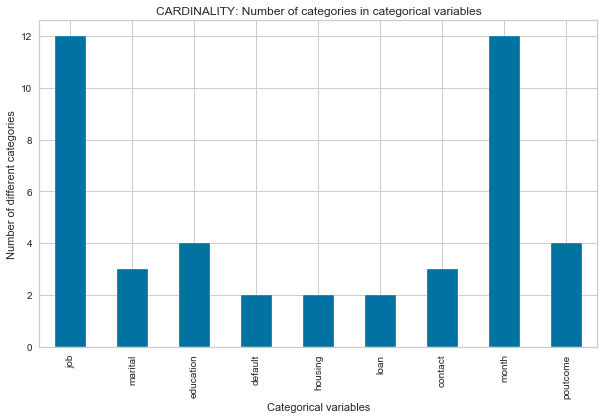

In [26]:
# plot number of categories per categorical variable

data[categorical].nunique().plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

**Note** : 6 variables have cardinality greater than 2

In [27]:
# function to create histogram, Q-Q plot and
# boxplot.
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

## Section 2 : Feature Engineering

We now transition to another important phase of the machine-learning process: `feature engineering`. A feature is another name for a variable.
The term feature engineering denotes the process of ["using domain knowledge to extract features from raw data"](https://en.wikipedia.org/wiki/Feature_engineering).
 It also refers to the process of transforming variables to render them more suitable for machine-learning algorithms, including, but limited to, imputing missing values, addressing outliers or extreme values and recoding categorical variables into numerical variables(most machine-learning algorithms cannot deal with qualitative  variables and so they have to be converted to numerical variables). 

#### 2.1 Dropping meaningless variables

In [28]:
#Dropping quazi-constant variable pday that lack useful information for modeling
#for df in [X_train,X_test]:
 #   df.drop(labels=["pdays"], inplace =True, axis = 1)

In [29]:
data.drop(labels=["pdays"], inplace =True, axis = 1)

In [30]:
#checking if the change was effected
data.shape

(45211, 15)

In [31]:
#checking the first five observations after dropping the pdays variable
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,0,unknown,0


#### 2.2 Outliers in Numerical variable

- previous: top-coding(6) 
- campaign: top-coding(10) 

In [32]:
# Defining functions to implement top-coding
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [data]:
    df['previous'] = top_code(df, 'previous', 6)
    df['campaign'] = top_code(df, 'campaign', 10)

In [33]:
# let's check that it worked
for var in ['previous','campaign']:
    print(var, ' max value: ', data[var].max())
    #print('\n')

previous  max value:  6
campaign  max value:  10


In [34]:
# The two discrete variables are converted to categorical  for feature-engineering purposes
for df in [data]:
    df['previous'] = df['previous'].astype('O')
    df['campaign'] = df['campaign'].astype('O')


In [35]:
# Checking data types are converting the previous and campaign variables to the object type
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
month        object
duration      int64
campaign     object
previous     object
poutcome     object
y             int32
dtype: object

In [36]:
# Screening the data for continuous and categorical variables again after converting the data types for certain variables (sanity check)
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='y' and  data[var].nunique()<10]
continuous = [var for var in  data.columns if  data[var].dtype!='O' and var!='y' and var not in discrete]

# categorical
categorical = [var for var in  data.columns if  data[var].dtype=='O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

There are 0 discrete variables
There are 3 continuous variables
There are 11 categorical variables


After conversion, we now have <strong>3</strong> continous variables and <strong>11</strong> categorical variables.

In [37]:
# Checking the column or variable names for the categorical variables
categorical=categorical 
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'campaign',
 'previous',
 'poutcome']

In [38]:
# Generating summary statistics for the continous variables
contin_vars= ['age', 'balance', 'duration']
data[contin_vars].describe()

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080
std,10.618762,3044.765829,257.527812
min,18.000000,-8019.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
max,95.000000,102127.000000,4918.000000


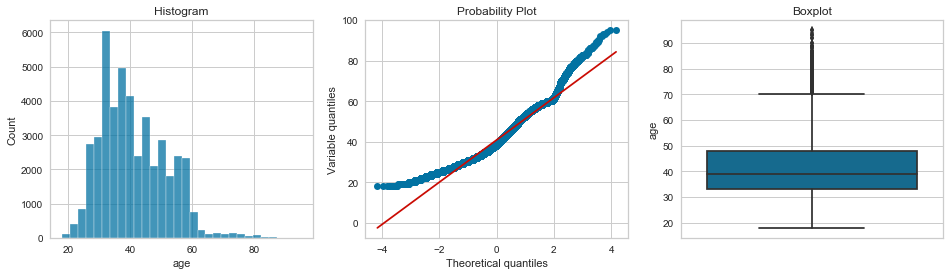

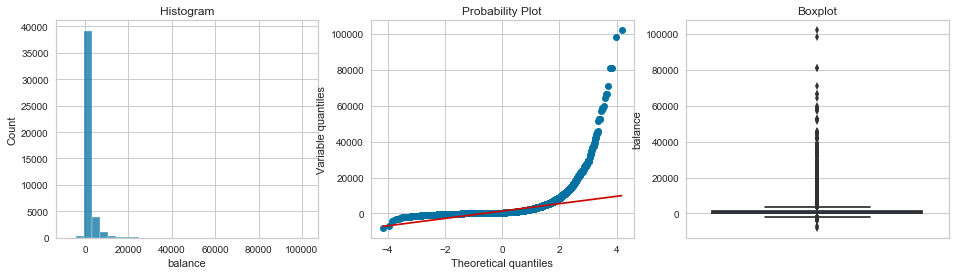

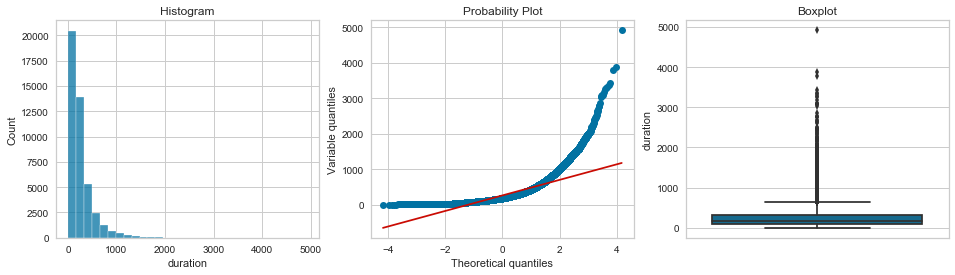

In [39]:
# checking the distribution of continous variables after transformation
contin_vars= ['age', 'balance', 'duration']
for df in [data]:
    for var in contin_vars:
        diagnostic_plots(df, var)

**Age** appears to be near-gaussian/normal in its distribution but does seem to have outliers; this issue will be remedied by capping this variable at the mean plus 3 times the standard deviation.
**Duration** and **balance** are clearly skewed and will be remedied by capping this variable above at the `75th Quartile` plus 1.5 times the interquartile range (IQR) and below at the `25th Quartile` minus 1.5 times the interquartile range (IQR).

Next we use the `Winsorizer` object from the `feature_engine` package to implement the remedial measures for the problem with outliers in the continuous variables. A description of the `feature-engine` python package may be found [here](https://feature-engine.readthedocs.io/en/1.0.x/).


In [40]:
# create the capper for AGE variable

windsoriser_age = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['age'])



In [41]:
#Capping Age variable; fitting the windsorise_age object to the data
windsoriser_age.fit(data)
#Tranforming the age variable
data_t   = windsoriser_age.transform(data)

In [42]:
# create the capper for duration and balance variables
windsoriser_dur_bal = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries 
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['duration','balance'])

In [43]:
#Capping duration and balance variables
windsoriser_dur_bal.fit(data_t)
data2   =  windsoriser_dur_bal.transform(data_t)

In [44]:
#Examing summary statistics of continous variables after removing outliers
contin_vars= ['age', 'balance', 'duration']
data2[contin_vars].describe()

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.889826,933.706974,234.939307
std,10.458640,1176.765369,176.749932
min,18.000000,-1962.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
max,72.792496,3462.000000,643.000000


In [45]:
# we can inspect the minimum caps for age variable
windsoriser_age.left_tail_caps_

{'age': 9.079924091402077}

In [46]:
# we can inspect the maximum caps for age variable
windsoriser_age.right_tail_caps_

{'age': 72.79249633725466}

In [47]:
# we can inspect the minimum caps for duration and balance variables
windsoriser_dur_bal.left_tail_caps_

{'duration': -221.0, 'balance': -1962.0}

In [48]:
# we can inspect the maximum caps for duration and balance variables
windsoriser_dur_bal.right_tail_caps_

{'duration': 643.0, 'balance': 3462.0}

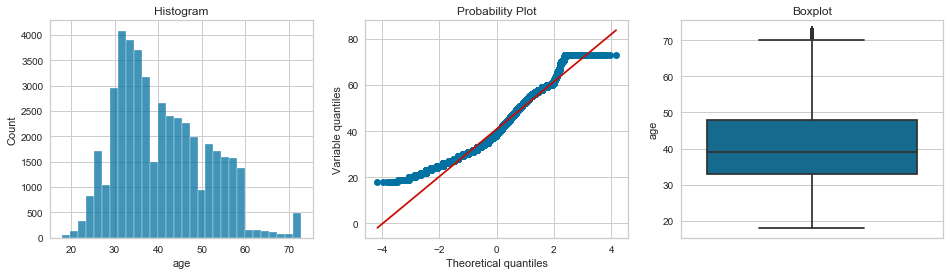

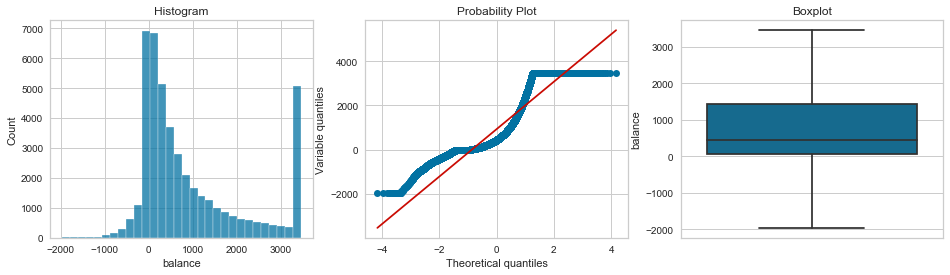

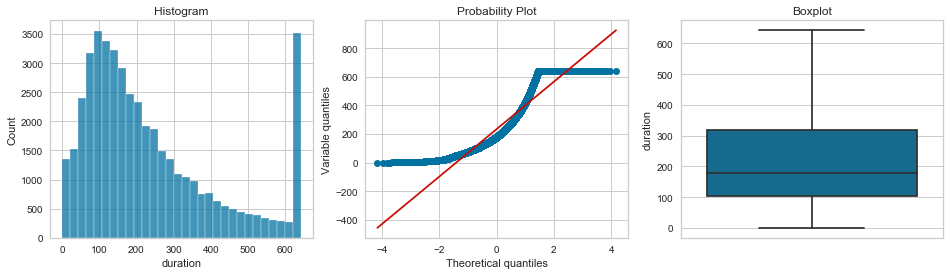

In [49]:
# checking the distribution of continous variables after transformation
contin_vars= ['age', 'balance', 'duration']
for df in [data2]:
    for var in contin_vars:
        diagnostic_plots(df, var)

As is evidenced above, the serious `outliers` have been removed.

#### 2.3 Engineering rare labels in categorical variables 

Rare labels are levels of a categorical or discrete variable that are present in less than  **1%** of the records or observations.

In [50]:
# find unfrequent labels in categorical variables
for var in categorical:
    print(var, data2[var].value_counts()/np.float(len(data2)))
    print()

job blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

marital married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

education secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

default no     0.981973
yes    0.018027
Name: default, dtype: float64

housing yes    0.555838
no     0.444162
Name: housing, dtype: float64

loan no     0.839774
yes    0.160226
Name: loan, dtype: float64

contact cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

month may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.0

- Variables that contain a lot of infrequent labels: replace by "rare" ( this prevents overfitting)
- Variables that contain rare labels : replace by most frequent category

In [51]:
# Defining function to flag categorical label with low proportion of observations as "rare"
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = data2.groupby([variable])[variable].count()/np.float(len(data2))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which=='frequent':
        # find the most frequent category
        mode_label = data2.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        data2[variable] = np.where(data2[variable].isin(frequent_cat), data2[variable], mode_label)
            
    else:
        data2[variable] = np.where(data2[variable].isin(frequent_cat), data2[variable], 'Rare')
   

In [52]:
#Imputing "rare" for rare labels
for col in categorical:
    rare_imputation(col, 'rare')

In [53]:
#Imputing "frequent" for rare labels
for col in categorical:
    rare_imputation(col, 'frequent')

In [54]:
# Checking to see if the change was effected
for var in categorical:
    print(var, data2[var].value_counts()/np.float(len(data2)))
    print()

job blue-collar      0.221627
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
Name: job, dtype: float64

marital married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

education secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

default no     0.981973
yes    0.018027
Name: default, dtype: float64

housing yes    0.555838
no     0.444162
Name: housing, dtype: float64

loan no     0.839774
yes    0.160226
Name: loan, dtype: float64

contact cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

month may    0.309217
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct 

#### 2.4 Encode categorical variables

- expiration and gender: one hot encoding (create dummy or indicator variables 1's and 0's)
- Remaining variables: replace by risk probability( this refers to replacing a category or level of a categorical or discrete variable with the mean of the response variable for that category or level)

In [55]:
# Implementing the creation of dummy variables
for df in [data2]:
    for var in ['loan','housing','default']:
        df[var]  = pd.get_dummies(df[var], drop_first=True)    

In [56]:
# Defining function to implement recoding of categorical lables with their respective probability of the outcome variable
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = data2.groupby([var])[target].mean().to_dict()
        
        # encode variables
        data2[var] = data2[var].map(ordered_labels)
        #X_test2[var] = X_test2[var].map(ordered_labels)

In [57]:
# Calling the encoding function for select categorical variables
categorical = [var for var in categorical if var not in['loan','housing','default']]
for col in categorical:
    encode_categorical_variables(col, 'y')# Y denotes the response or dependent variable

In [58]:
#let's inspect the dataset after the feature engineering stage
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,58.0,0.137556,0.101235,0.150064,0,2143.0,1,0,0.040707,0.073319,261.0,0.14448,0.091573,0.091615,0
1,44.0,0.110570,0.149492,0.105594,0,29.0,1,0,0.040707,0.073319,151.0,0.14448,0.091573,0.091615,0
2,33.0,0.082717,0.101235,0.105594,0,2.0,1,1,0.040707,0.073319,76.0,0.14448,0.091573,0.091615,0
3,47.0,0.074052,0.101235,0.135703,0,1506.0,1,0,0.040707,0.073319,92.0,0.14448,0.091573,0.091615,0
4,33.0,0.074052,0.149492,0.135703,0,1.0,0,0,0.040707,0.073319,198.0,0.14448,0.091573,0.091615,0


In [59]:
# Examining the dimensions of the training and test data sets
data2.shape

(45211, 15)

## Section 3 : Address Imbalance in the Dataset

Dataset or class imbalance refers to a scenario wherein there exists an unequal distribution of records across the classes in a dataset, i.e. the number of observations belonging to  the negative class (majority class) is very large compared to those associated the positive class (minority class). Typically, the class of importance, i.e. the one that we are interested in classifying records to, is the minority class; and, the imbalance in the dataset, if left untreated, will lead to sub-optimal performance of a binary classifier.
Notably, there exist several techniques that have been developed for addressing imbalance in modeling datasets. Some address this problem by *oversampling* members of the minority class, for example SMOTE(Synthetic Minority Oversampling Technique) and it's many variants (SMOTE, Borderline-SMOTE and SVM-SMOTE), to name a few. On the other hand, there exists other techniques that aim to address the imbalance in the classes by *undersampling* members of the majority class(examples include: ENN and Tomek Links). Further, the issue with imbalance classes may be treated by applying a combination of *oversampling* and *undersampling* techniques (for example:`SMENN` and `SMOTETomek`). A more detailed description of the techniques referenced above can be found in this [article](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/).

In this section, I implement variants of the `SMOTE` technique and and a combination *oversampling* and *undersampling* techniques, referenced above. Note that the data is split into a training and testing/validation samples, then the treatments are applied. Here various treatments are then tested using a `Random Forest` model with model performance being measaured by the `roc-auc` metric. A `roc-auc` value is greater than 0.5 or 50% signals that model is better than random guessing.
See [wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) for more on the ROC( Receiver Operating Characteristic metric).


In [60]:
# Creating a dictionary of objects implementing various undersampling and oversampling techniques
oversampler_dict = {

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),

    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=4),

    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=4),

}

In [61]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=100, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

In [62]:
# to save the results
results_dict = {}
shapes_dict = {}

#for dataset in datasets_ls:
    
results_dict['data2'] = {}
shapes_dict['data2'] = {}
    
print('data2')
    
    # load dataset
    #data = fetch_datasets()[dataset]
    
    # separate train and test
X_train, X_test, y_train, y_test = train_test_split(
data2.drop('y', axis=1),  # predictors
data2.y,  # target
   
test_size=0.3,
random_state=0)
    
    # as some oversampling techniques use KNN
    # we set variables in the same scale
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
        
roc = run_randomForests(X_train, X_test, y_train, y_test)
    
    # store results
results_dict['data2']['full_data'] = roc
shapes_dict['data2']['full_data'] = len(X_train)
    
print()
    
for oversampler in oversampler_dict.keys():
    print(oversampler)

            # resample
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)

            # evaluate performance
    roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)

            #store results
    results_dict['data2'][oversampler] = roc
    shapes_dict['data2'][oversampler] = len(X_resampled)
    print()

    print()

data2
Train set
Random Forests roc-auc: 0.8953730991058915
Test set
Random Forests roc-auc: 0.8858777023507175

smote
Train set
Random Forests roc-auc: 0.9045050078176196
Test set
Random Forests roc-auc: 0.8579297458874297


border1
Train set
Random Forests roc-auc: 0.8968852624889363
Test set
Random Forests roc-auc: 0.8522509953220323


svm
Train set
Random Forests roc-auc: 0.9193554012244151
Test set
Random Forests roc-auc: 0.8754462350623121


smenn
Train set
Random Forests roc-auc: 0.9101884933953863
Test set
Random Forests roc-auc: 0.8628442703734909


smtomek
Train set
Random Forests roc-auc: 0.9068274684213236
Test set
Random Forests roc-auc: 0.8588943328258398




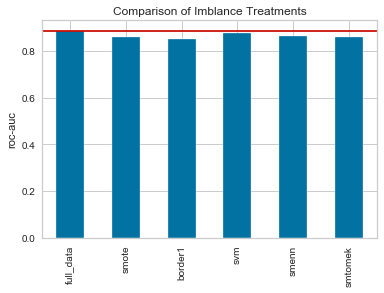

In [63]:
#Checking the preformance of the Random Forest model across various oversampling and undersampling techniques
 # Performance is measure by the roc-auc metric 
pd.Series(results_dict['data2']).plot.bar()
plt.title('Comparison of Imblance Treatments')
plt.ylabel('roc-auc')
#     plt.ylim(0.55, 0.9)
plt.axhline(results_dict['data2']['full_data'], color='r')
plt.show()

Surprisingly, the performance of the `Random Forest` model with the original data (before the treatment for imbalance) proved superior to its performance with the various `oversampling`, `undersampling` and `hybrid treatments`. Therefore, the original dataset will be used as is for the remainder of this machine-learning tutorial.

**Note**: Applying the `MinMaxScaler` object to the training (X_train) and testing(X_test) samples coverted the dataframes into numpy arrays without the orginal columns names; therefore, I will convert the numpy arrays to dataframes and add back the columns names below.


In [64]:
# Columns to be added
col=[col for col in data.columns if col not in ['y']]

In [65]:
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'month',
 'duration',
 'campaign',
 'previous',
 'poutcome']

In [66]:
# Checking the dimensions of the training sample
X_train.shape

(31647, 14)

In [67]:
# Converting the training array to a datafram and adding back the column names
X_train = pd.DataFrame(X_train)
X_train.columns = data2[col].columns

In [68]:
# Checking the dimensions of the testing/validation sample
X_test.shape

(13564, 14)

In [69]:
# Converting the testing array to a datafram and adding back the column names
X_test = pd.DataFrame(X_test)
X_test.columns = data2[col].columns

In [70]:
# Checking the first 5 records of the training sample
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,0.730027,0.298520,0.000000,0.000000,0.0,0.549963,0.0,0.0,0.0,0.063127,0.318818,1.000000,0.0,0.0
1,0.675275,0.000000,0.000000,0.774900,0.0,0.397861,0.0,0.0,1.0,0.082432,0.261275,0.684256,0.0,0.0
2,0.584022,0.225521,0.000000,0.302975,0.0,0.391040,1.0,0.0,0.0,0.000000,0.335925,0.684256,0.0,0.0
3,0.456267,0.298520,0.000000,0.000000,0.0,0.708333,1.0,0.0,1.0,0.039446,0.097978,0.287466,0.0,0.0
4,0.638774,0.171665,0.377559,1.000000,0.0,0.481010,1.0,0.0,0.0,0.000000,0.796267,0.287466,0.0,0.0


In [71]:
# Checking the first 5 records of the testing/validation sample
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,0.346763,0.298520,0.0,1.000000,0.0,0.620391,1.0,0.0,1.000000,0.039446,0.141524,0.000000,0.000000,0.000000
1,0.328512,0.069470,1.0,0.302975,0.0,0.315081,1.0,0.0,1.000000,0.276480,1.000000,1.000000,0.000000,0.000000
2,0.529270,0.000000,0.0,0.000000,0.0,0.286873,0.0,1.0,0.861877,0.039446,0.377916,0.360801,0.000000,0.000000
3,0.711776,0.065113,0.0,0.000000,0.0,0.454093,1.0,1.0,1.000000,0.208597,0.163297,0.216259,0.726276,0.062058
4,0.273760,0.000000,0.0,0.302975,1.0,0.286873,1.0,1.0,1.000000,0.039446,0.516330,0.684256,0.000000,0.000000


## Section 4 : Feature Selection

We have now come to another fundamental step in the machine-learning model buiding process: feature selection ,also know as variable selection or variable subset selection.
This refers to the process of selecting a subset of relevant variables /features or predictors for use in the model buiding process.
In model-building the term "less is more" is apropos; Slimming the candidate pool of predictors is important for a number of factors:
* Simpler models tend to be more interpretable and are more easily deployed in production.
* They are less computationally expensive (use less computing resources);also, they train faster.
* They avoid the [curse of dimensionality](https://en.wikipedia.org/wiki/Feature_selection).
* And they are more generalizable (prevents overfitting, a term defined earlier).

In [72]:
# Checking y_train and y_test
y_train.shape, y_test.shape

((31647,), (13564,))

They represent the response vectors of the training and testing samples.

In [73]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook
 
X_train_original = X_train.copy()
X_test_original = X_test.copy()
X_train_original.shape, X_test_original.shape

((31647, 14), (13564, 14))

#### 3.1 Remove constant features

Here we remove variables or features with constant values as they contain no information or discriminating value for the purpose of model building.

In [74]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
 
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((31647, 14), (13564, 14))

There were no constant features. Great!

#### 3.2 Remove quasi-constant features

Quasi-constant or nearly constant features/variables are also removed from the modeling dataset for same reason that we remove constant features.

In [75]:
# remove quasi-constant features
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately
 
sel.fit(X_train)  # fit finds the features with low variance
 
sum(sel.get_support()) # how many not quasi-constant?

14

In [76]:
features_to_keep = X_train.columns[sel.get_support()]

In [77]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
 
X_train.shape, X_test.shape

((31647, 14), (13564, 14))

In [78]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly
 
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep
 
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

There are no quasi-constant features!

#### 3.3 Remove duplicated features

Duplicate features had absolutely no value and are therefore removed from the modeling dataset.

In [79]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10


0

In [80]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((31647, 14), (13564, 14))

Alas! There are no duplicate features

In [81]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook
 
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

#### 3.4 Remove correlated features

Duplicate features are also removed as they provide no marginal information for model-buiding; and in fact may do more to harm than help.
Variables that are highly collinear (closely related to each other) may cause some statistical modeling techniques to perform poorly. 
Therefore, it is wise to remove such variables from the modeling dataset. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Multicollinearity) for more multicollinearity.

In [82]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [83]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((31647, 14), (13564, 14))

In [84]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [85]:
X_train_corr.shape

(31647, 14)

There are no highly correlated features either.

#### 3.5 Remove features using univariate ROC-AUC

This process is used to extract features whose `roc` value is greater than 0.5 or 50%. Which means that group assignment based on those features is not based on random chance.
See [wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) for more on the ROC( Receiver Operating Characteristic metric).

In [86]:
# find important features using univariate roc-auc
 
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

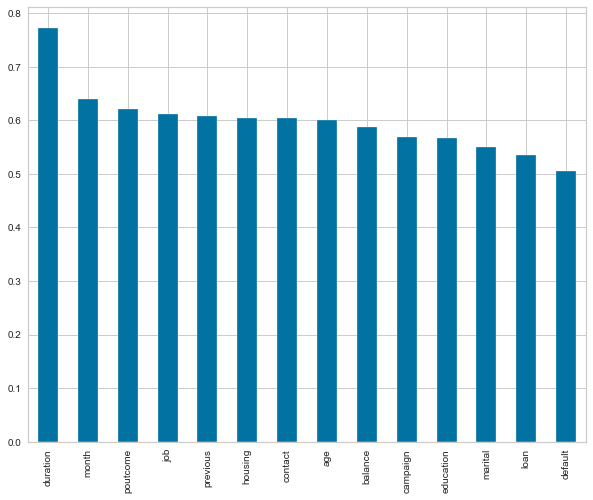

In [87]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(10, 8))

In [88]:
# by removing features with univariate roc_auc == 0.5
# we remove another 1 feature
 
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(14, 14)

It appears that all the `14` remaining features all have `roc` values greater than <strong>0.5</strong> or <strong>50%</strong>; no features were removed for having `roc` values less than **50%**.

#### 3.6 Select features by the regression coefficients

This process extracts features or predictors by their individal level of statistical significance;this is, if individually they are shown to be highly related to the `response` variable, manifested in low [p-values](https://en.wikipedia.org/wiki/P-value).

In [89]:
# Scaling features for the regression model
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

This above object is used to scale features, i.e transforming their values with the [0,1] range. This is critical as some variables with value, such as income, may exert a disproportionate impact on certain statistical and machine learning algorithms, leading to sub-optimal performance.
See this [article](https://en.wikipedia.org/wiki/Normalization_(statistics)) for more on standardizing features for modeling purposes.

In [90]:
# select features using the coefficient of a non
# regularised logistic regression
 
sel_ = SelectFromModel(LogisticRegression(C=1000))
sel_.fit(scaler.transform(X_train), y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_coef = pd.DataFrame(sel_.transform(X_train))
X_test_coef = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_coef.columns = X_train.columns[(sel_.get_support())]
X_test_coef.columns = X_train.columns[(sel_.get_support())]

In [91]:
X_train_coef.shape, X_test_coef.shape

((31647, 5), (13564, 5))

Notice above that only `5` features were found to have a statistically significant relationship with the `response` variable using Logistic Regression technique

## Section 4 : Find the best `feature set` using the Random Forest Algorithm

The *Random Forest* machine-learning algorithm is a tree-based technique;a conceptual description of the same technique can be found [here](https://www.statlearning.com/).

In [92]:
# create a function to build random forests and compare performance in train and test set
 
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [93]:
# original data set
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.909552935857546
Test set
Random Forests roc-auc: 0.8985829903845123


In [94]:
X_train_original.shape

(31647, 14)

In [95]:
# embedded methods - Logistic regression coefficients
run_randomForests(X_train_coef,
                  X_test_coef,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9063740220140191
Test set
Random Forests roc-auc: 0.8929798793172854


In [96]:
X_train_coef.shape,X_test_coef.shape

((31647, 5), (13564, 5))

#### Note:
Selecting features using the logistic regression coefficients (**5 features**) yields a performance only slightly worse than the performance with the original feature set(**14 features**),. This means that many of those 9 features are redundant, and the the original feature space can be reduced further without loosing performance significantly. Following the occam razor or [minimum description length principle](https://en.wikipedia.org/wiki/Minimum_description_length), I will adopt the `5-feature` set as the final set of predictors for further investigation.

## Section 5 : Build 10 Competing Models

Having selected the original feature set as the most predictive candidate predictors,the next step involved using the same feature pool to estimate 10 different models leveraging a combination linear and non-linear classification algorithms.
And the best performing algorithm is then selected using the average classification accuracy generated by the stratified 10-fold cross validation modeling technique.
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.
For more on this technique, read this [article](https://machinelearningmastery.com/k-fold-cross-validation/).

The 10 algorithms tested include:
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).
* XGBoost(XGB).
* Random Forest(RF).
* AdaBoost(ADA)
* Artificial Neural Network (ANN)

This list represents a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB,SVM,XGB,RF,ADA and ANN) algorithms.
For a comprehensive coverage of all algorithms used in this tutorial, I suggest reading the book titled [An Introduction to Statistical Learning](https://www.statlearning.com/).

LR: 0.898221 (0.002387)
LDA: 0.896957 (0.002754)
KNN: 0.894966 (0.002893)
CART: 0.884001 (0.004022)
NB: 0.888236 (0.004498)
SVM: 0.894208 (0.002267)
XGB: 0.903687 (0.002523)
RF: 0.888551 (0.005111)
ADA: 0.900338 (0.002301)
ANN: 0.902266 (0.003008)


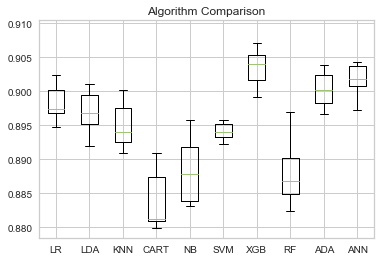

In [97]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', xgb.XGBClassifier(eval_metric='logloss')))
models.append(('RF',RandomForestClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('ANN',MLPClassifier(hidden_layer_sizes=(30,30,30))))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_coef, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 5.1 Select the Best of 10 Algorithms using Stratified 10-fold Cross Validation

Now, we must choose an algorithm to be used for making predictions.

The results reflected in the `box and whiskers` charts above suggest that the most accurate models are `XGB`,`ADA` and `ANN` based mean accuracy scores. We will carried forward these model in our tutorial for further analysis

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best three models. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result. Eventually, one model will be selected (the most performant model judged by `accuracy` and other metrics such as the `precision`, `recall`, `F1 score` and `roc-auc`).

This will give us an independent final check on the accuracy of the best two models. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result. Eventually, one model will be selected (the most performant model judged by `accuracy` and other metrics such as the `precision`, `recall`, `F1 score` and `roc-auc`).

In the context of binary classification modeling, `accuracy` indicates the total number of observations from both classes that were classified correctly;of note, `accuracy` is not a good measure for unbalanced data as it does not reflect the performance of each class, particularly the class we are interested in, i.e the minority or positive class. The `recall`( sensitivity) measure indicates the total number of observations from the minority or positive class that was correctly classified or identified by the model; the `precsion` measure, on the other hand, tell us how many of total number of observations that were identified as belonging to the minority or positive class  that were actually positive or of the minority class. The `F1 score` is the weighted harmonic mean of the `precision` and `recall` scores; maximizing the `F1 score` ensures the optimization of the value of the `precision` measure relative to that of the `recall`. Finally, the `roc-auc` measure is the most used to evaluate the performance of classification algorithms.

The `accuracy`, `precision` and `recall` and `roc-auc` scores vary between `0` and `1`, with <strong>1</strong> being the highest; the closer the value these measures is to **1**, the better is the performance of a classifier. In addition a `roc-auc` score of `0.5` is equivalent to the performance of a naive model based on random guessing; therefore, a classifier whose `roc-auc` is greater thjan `0.5`, is deemed to be better than merely guess randomly. A more comprehensive description of the `precision`, `recall` and `accuracy` metrics referenced above may be found [here](https://en.wikipedia.org/wiki/Sensitivity_and_specificity). 

## Section 6: Make Predictions and Evaluate Models

Next, the models are fitted to the entire training dataset and predictions are made on the validation dataset.

XGB's Accuracy is: 0.895975 
[[11415   554]
 [  857   738]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11969
           1       0.57      0.46      0.51      1595

    accuracy                           0.90     13564
   macro avg       0.75      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     13564



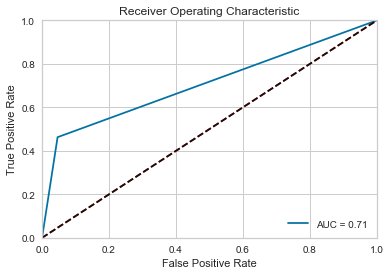

ADA's Accuracy is: 0.895311 
[[11605   364]
 [ 1056   539]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.60      0.34      0.43      1595

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



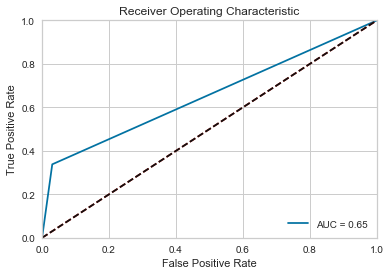

ANN's Accuracy is: 0.897228 
[[11522   447]
 [  947   648]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11969
           1       0.59      0.41      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564



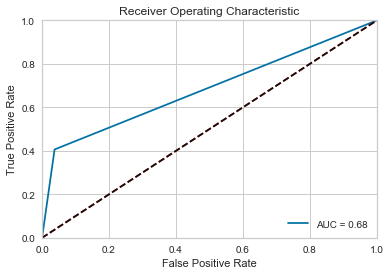

In [98]:
# Testing the three models(XGB, ADA and ANN) on the validation/testing dataset to determine the best of the three models
results_dict = {}
models2 = []
models2.append(('XGB', xgb.XGBClassifier(eval_metric='logloss')))
models2.append(('ADA',AdaBoostClassifier()))
models2.append(('ANN',MLPClassifier(hidden_layer_sizes=(30,30,30))))
# evaluate each model in turn
results2 = []
names2 = []
for name, model in models2:
    model.fit(X_train_coef, y_train)
    predictions = model.predict(X_test_coef)
    results_dict[name]=accuracy_score(y_test, predictions)
    results2.append(predictions)
    names2.append(name)
    print('%s\'s Accuracy is: %f ' % (name, accuracy_score(y_test, predictions)))
    # Evaluate predictions
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    
        # calculate roc curves
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
    #thresholds
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

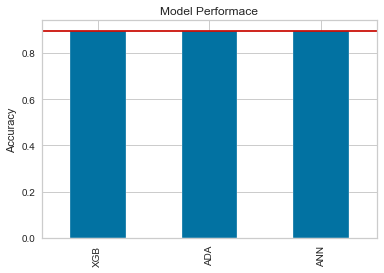

In [99]:
#Plotting the accuracy scores for the three models (XGB,ADA and ANN)
pd.Series(results_dict).plot.bar()
plt.title('Model Performace')
plt.ylabel('Accuracy')
#     plt.ylim(0.55, 0.9)
plt.axhline(results_dict['ANN'], color='r')
plt.show()

As refelected above, the `XGB` model yields a moderately better performance than the other two model based on a superior `roc-auc` score of **71%** and the best balance of `precision` and `recall` scores. Therefore, we'll select the `XGB model` as our final model.

In [100]:
# extracting the models into a list
models3 = []
for name, model in models2:
    models3.append(model)

In [101]:
# Showing elements of the new list
models3 

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=None),
 AdaBoostClassifier(),
 MLPClassifier(hidden_layer_sizes=(30, 30, 30))]

In [102]:
# Extracting the XGB model from the list of model for further analysis
XGB=models3[0]

In [103]:
# Sanity Check
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### 6.1 Discrimination Threshold Tuning

Next, we will need to optimise or fine tune the binary discrimination (threshold or the probability cutoff for classifying observations between the two classes), in order to optimise the `precision`, `recall` and `F-scores`.
["The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the 'decision threshold,' 'discrimination threshold,'or simply the 'threshold.' The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1"](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/).

However,the 0.5 default probability cutoff is not appropriate for imblanced datasets. Therefore, I needed to determine the appropriate cutoff probability for the data that will optimize the performance of our XGB model.
The optimal cutoff for the data is one that will maximize the F-score and thereby optimizing the `precision` and `recall` scores.
The python [DiscriminationThreshold](https://www.scikit-yb.org/en/latest/api/classifier/threshold.html) object of the `yellowbrick` module can be used to compute the optimal cutoff probability or threshold for our imbalance dataset.

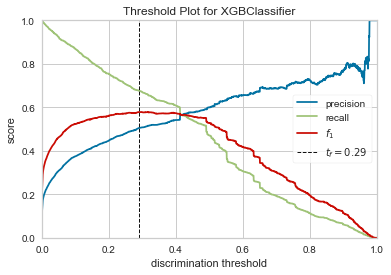

In [104]:
# Finding the optimal threshold

visualizer = DiscriminationThreshold(XGB,
                                         n_trials=1,
                                         cv=0.5,
                                         argmax='fscore',
                                         random_state=0,
                                         is_fitted='auto',
                                         exclude = "queue_rate")

visualizer.fit(X_train_coef, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_coef, y_test)        # Evaluate the model on the test data
visualizer.show()


In [105]:
# Implementing the optimized cutoff threshold of 0.29 in the classification routine.
threshold = 0.29
XGB_Grid_ytest_THR = ((models3[0].predict_proba(X_test_coef)[:, 1])>= threshold).astype(int)

In [106]:
print('Valuation for test data only:')
print(confusion_matrix(y_test, models3[0].predict(X_test_coef)))
print(classification_report(y_test, models3[0].predict(X_test_coef)))
print("----------------------------------------------------------------------")
print(confusion_matrix(y_test, XGB_Grid_ytest_THR))
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_test, XGB_Grid_ytest_THR))

Valuation for test data only:
[[11415   554]
 [  857   738]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11969
           1       0.57      0.46      0.51      1595

    accuracy                           0.90     13564
   macro avg       0.75      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     13564

----------------------------------------------------------------------
[[10819  1150]
 [  459  1136]]
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     11969
           1       0.50      0.71      0.59      1595

    accuracy                           0.88     13564
   macro avg       0.73      0.81      0.76     13564
weighted avg       0.90      0.88      0.89     13564



as evidenced above, the `recall` and `F-score` improved with the implementation of the new threshold;however, the `precison` score degraded slightly, going from **0.57** to **0.50**.
Overall, the optimised threshold yielded an improvement in performance.

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_Grid_ytest_THR)
#thresholds

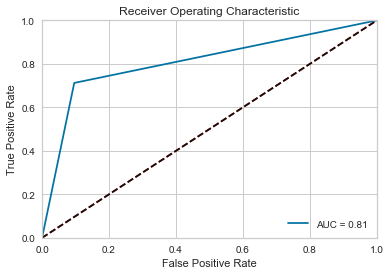

In [108]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Notice that the `roc-auc` score improved with the optimization of the `discrimination` thresold.

#### 6.2 Calculating Lift Score
*Lift measures the degree to which the predictions of a classification model are better than randomly-generated predictions.*

In [109]:
from mlxtend.evaluate import lift_score
lift_score(y_test, XGB_Grid_ytest_THR)

4.225997142206754

Also, it is note worthy that the `XGB` model has a lift of approx. **4.23** , which means that the predictions of this classification is **4** times better than randomly-generated predictions

#### 6.3 Feature of Importance
We examine the top features using the `XGB` model


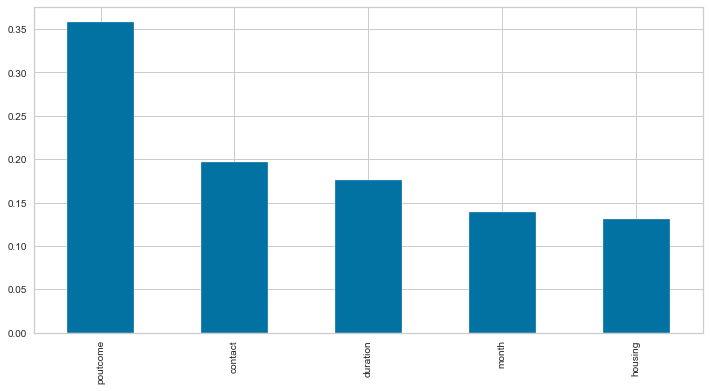

In [110]:
for name, model in models2:
    if name == 'XGB':
        importance = pd.Series(model.feature_importances_)
        importance.index = X_train_coef.columns
        importance.sort_values(inplace=True, ascending=False)
        importance.plot.bar(figsize=(12,6))

#### 6.4 Conclusion

The goal of the project is to provide a step-by-step tutorial/work flow around the estimation of a machine-learning model aimed at predicting likelihood of a client or prospective client subscribing(opening) to a term deposit. I estimated **10** models and the `XGBoost (XGB)` model emerged as the superior model based on  on a superior `roc-auc` score of **71%** and the best balance of `precision` and `recall` scores; further, the `XGB` model yielded a lift of approx. **4.23** , which means that the predictions of this classification is **4** times better than randomly-generated predictions.

Notably, the **5** most important predictors of whether a client will subscribe to a term deposit, in order of importance are given below :

1. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').
2. `contact`: contact communication type (categorical: 'cellular','telephone').
3. `duration`: last contact duration, in seconds (numeric).
4. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec').
5. `housing`: has housing loan? (categorical: 'no','yes','unknown').

    
`Note`: A limitation of the `Feature of Importance` chart is that it only ranks the features in order of their relative predictive power; it does not provide any insight into the direction of the relationship between the predictors and the outcome of importance (i.e. the response or dependent variable); also, for categorical variables, the feature of importance chart does not tell us which category is predictive of the desired behavioral outcome.
        